## EDA: Análisis Exploratorio de Datos (AED)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt


# Configuración para visualizaciones
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [30]:
# Cargar el dataset
data_path =  './data/processed/'

df = pd.read_csv('./data/raw/credit_card_transactions.csv')

# Ver primeras filas
df.head()
df #wrangler

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2024-12-04 13:19:22,659.56,Zachary Morales,West LLC,5261,Brownborough,iOS,169.64.249.243,1.25,0
9996,9997,2024-12-23 16:53:22,290.46,Douglas Gallagher,Thompson-Phillips,5968,New Erin,Android,91.139.246.126,11.04,0
9997,9998,2025-01-30 19:45:52,337.55,Gregory Jarvis,"Williams, Castillo and Luna",5812,Alanville,iOS,183.67.160.124,27.00,0
9998,9999,2025-03-12 21:30:01,322.15,Kevin Pena,"English, Cervantes and Gutierrez",7299,East Martin,iOS,188.156.148.191,3.26,0


#### Realizar un análisis descriptivo del conjunto de datos, incluyendo estadísticas descriptivas y visualización de la distribución de las variables.

In [31]:
# Dimensiones del dataset
print(f"Filas y columnas: {df.shape}")


Filas y columnas: (10000, 11)


In [32]:
# Estructura del DataFrame
df.info()

# Porcentaje de valores nulos
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     10000 non-null  int64  
 1   Time              10000 non-null  object 
 2   Amount            10000 non-null  float64
 3   CardholderName    10000 non-null  object 
 4   MerchantName      10000 non-null  object 
 5   MCC               10000 non-null  int64  
 6   Location          10000 non-null  object 
 7   Device            10000 non-null  object 
 8   IPAddress         10000 non-null  object 
 9   TransactionSpeed  10000 non-null  float64
 10  Fraud             10000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB

Porcentaje de valores nulos por columna:
TransactionID       0.0
Time                0.0
Amount              0.0
CardholderName      0.0
MerchantName        0.0
MCC                 0.0
Location            0.0
Device 

In [33]:
# Solo estadísticas para columnas numéricas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
TransactionID,10000.0,5000.500000,2886.895680,1.00,2500.7500,5000.500,7500.250,10000.00
Amount,10000.0,547.347491,460.047329,10.09,263.2225,512.240,759.935,4988.07
MCC,10000.0,5950.102900,664.526287,5261.00,5411.0000,5812.000,5968.000,7299.00
TransactionSpeed,10000.0,30.738446,19.092345,0.11,14.9100,29.655,45.270,119.86
Fraud,10000.0,0.019200,0.137234,0.00,0.0000,0.000,0.000,1.00


Observamos que no encontramos 0s en las variables numericas de tipo razon, consecuente no se imputaran nulos

In [34]:
# Solo columnas categóricas
df.select_dtypes(include='object').describe().T


,count,unique,top,freq
Time,10000,10000,2025-04-23 08:32:15,1
CardholderName,10000,9439,Melissa Davis,5
MerchantName,10000,8677,Smith and Sons,17
Location,10000,7697,West Michael,14
Device,10000,4,Android,2556
IPAddress,10000,10000,84.235.245.188,1


Identificar valores atípicos

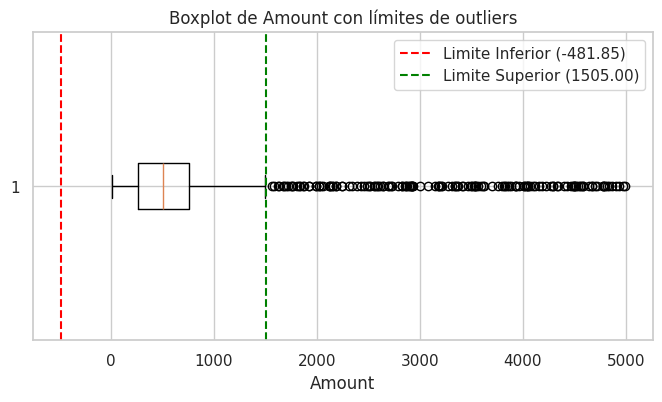

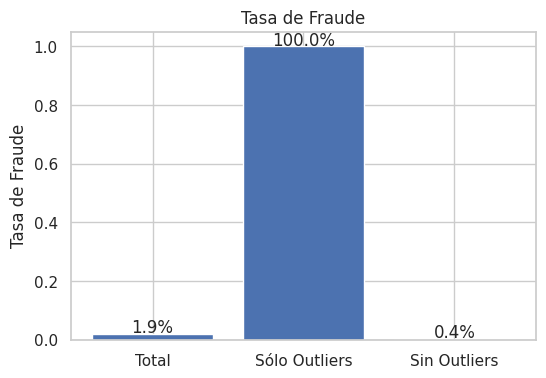

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

#Calcular cuartiles e IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

#Boxplots para visualizar outliers
plt.figure(figsize=(8,4))
plt.boxplot(df['Amount'], vert=False, showfliers=True)
plt.axvline(lim_inf, color='red', linestyle='--', label=f'Limite Inferior ({lim_inf:.2f})')
plt.axvline(lim_sup, color='green', linestyle='--', label=f'Limite Superior ({lim_sup:.2f})')
plt.title('Boxplot de Amount con límites de outliers')
plt.xlabel('Amount')
plt.legend()
plt.show()

#Separar outliers y resto
outliers = df[(df['Amount'] < lim_inf) | (df['Amount'] > lim_sup)]
cleaned  = df[~((df['Amount'] < lim_inf) | (df['Amount'] > lim_sup))]

#Calcular tasas de fraude
rate_all   = df['Fraud'].mean()
rate_out   = outliers['Fraud'].mean()
rate_clean = cleaned['Fraud'].mean()

#Contar registros
n_all   = len(df)
n_out   = len(outliers)
n_clean = len(cleaned)

#Visualizar tasas y volúmenes
labels = ['Total', 'Sólo Outliers', 'Sin Outliers']

#Gráfico de tasa de fraude
plt.figure(figsize=(6,4))
plt.bar(labels, [rate_all, rate_out, rate_clean])
plt.ylabel('Tasa de Fraude')
for i, y in enumerate([rate_all, rate_out, rate_clean]):
    plt.text(i, y + 0.005, f'{y*100:.1f}%', ha='center')
plt.title('Tasa de Fraude')
plt.show()


Aunque los outliers representan apenas el 1.5 % del total (150 de 10 000), concentran el 100 % de los fraudes.
Si se eliminan “por atípicos”, el resto de las transacciones apenas muestra un 0.4 % de fraude, lo que significa que descartaría toda la señal de fraude y dejaríamos un dataset con casi ningún caso crítico.

Por ello, no eliminamos los outliers.

Identificamos a TrasactionID, como un ID, no una variable (1). MCC como una variable categorica (2). El booleano Fraude, asi mismo tambien es categorica (3). Por ultimo, la fecha no se encuentra en el formato debido (4).

Consecuente, se transformara la fecha al formato debido, se exclurira el ID del analisis, y se corregiran los tipos de variables segun su naturaleza

In [36]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

# (1)
if 'TransactionID' in numeric_columns:
    # Eliminar 'TransactionID' de las columnas numéricas
    numeric_columns.remove('TransactionID')

#(2)
if 'MCC' in numeric_columns:
    # Eliminar 'MCC' de las columnas numéricas
    numeric_columns.remove('MCC')
    categorical_columns.append('MCC')

#(3)
if 'Fraud' in numeric_columns:
    # Eliminar 'Fraud' de las columnas numéricas
    # y agregarla a las columnas categóricas
    numeric_columns.remove('Fraud')
    categorical_columns.append('Fraud')

# (4)
df['Time'] = pd.to_datetime(df['Time'])
if 'Time' in categorical_columns:
    categorical_columns.remove('Time')
    numeric_columns.append('Time')

print(f'numeric_columns: {numeric_columns}')
print(f'categorical_columns: {categorical_columns}')


numeric_columns: ['Amount', 'TransactionSpeed', 'Time']
categorical_columns: ['CardholderName', 'MerchantName', 'Location', 'Device', 'IPAddress', 'MCC', 'Fraud']


Se propone extraer caracterisitcas, de la variable Time, corresponiente a un a: `Month`,`Day`,`WeekDay`, `Hour`.   

In [37]:
import pandas as pd

df['Time'] = pd.to_datetime(df['Time'])

df['Month']   = df['Time'].dt.month.astype(int)
df['Day']     = df['Time'].dt.day.astype(int)
df['WeekDay'] = df['Time'].dt.day_name()             # o usar .dt.weekday para 0=Lunes…6=Domingo
df['Hour']    = df['Time'].dt.hour.astype(int)

df.head()



,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud,Month,Day,WeekDay,Hour
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0,3,9,Sunday,6
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0,2,14,Friday,5
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0,5,3,Friday,15
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0,5,3,Friday,9
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0,4,24,Thursday,17


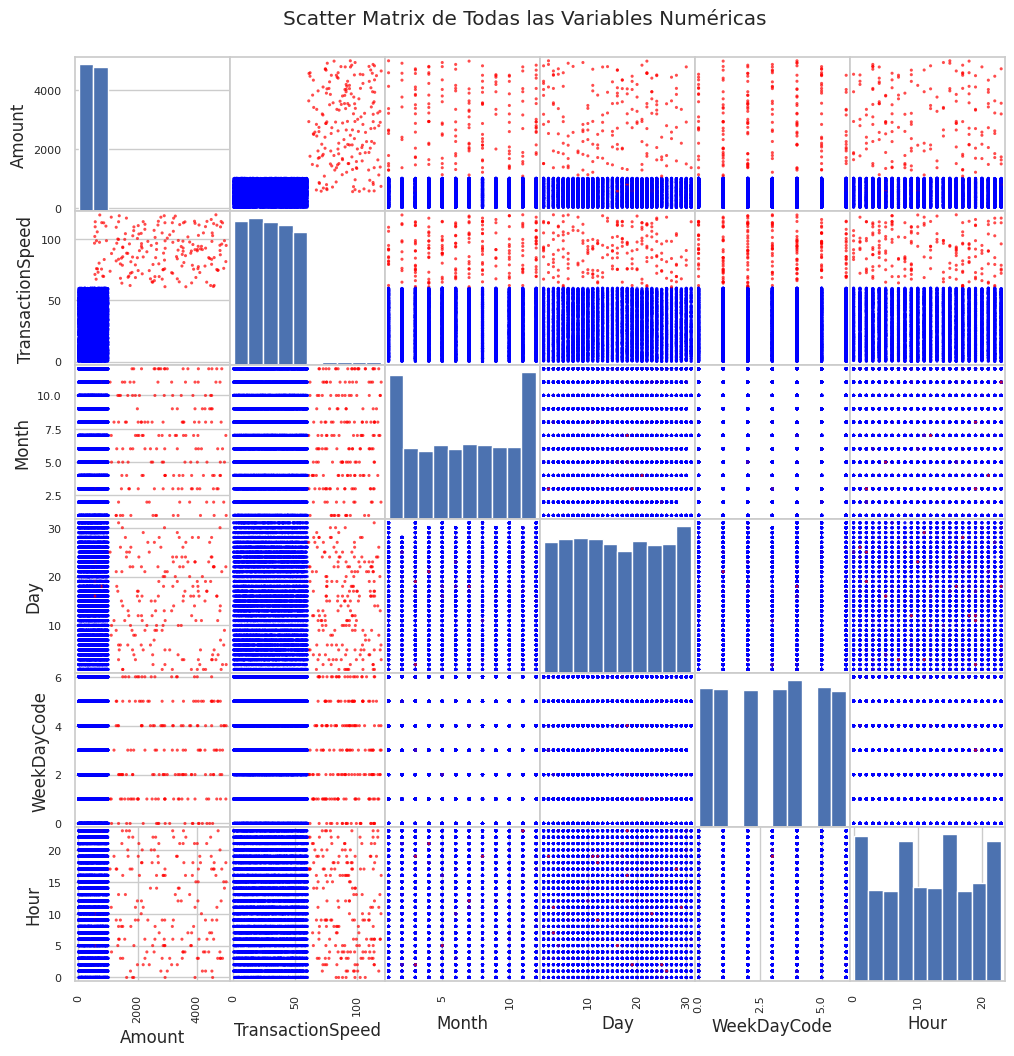

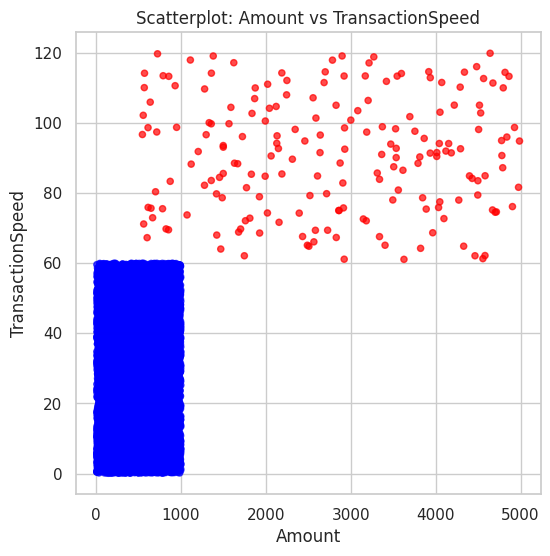

In [38]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# 1. Convertir WeekDay a código numérico si no está ya
df['WeekDayCode'] = df['WeekDay'].astype('category').cat.codes

# 2. Seleccionar todas las variables numéricas
num_cols = ['Amount', 'TransactionSpeed', 'Month', 'Day', 'WeekDayCode', 'Hour']
plot_df_all = df[num_cols]

# 3. Paleta de colores (azul=legítimo, rojo=fraude)
colors = df['Fraud'].map({0: 'blue', 1: 'red'})

# 4. Scatter‐matrix de todas las variables numéricas
scatter_matrix(
    plot_df_all,
    figsize=(12, 12),
    diagonal='hist',
    marker='o',
    c=colors,
    s=5,
    alpha=0.7
)
plt.suptitle('Scatter Matrix de Todas las Variables Numéricas', y=0.92)
plt.show()

# 5. Scatterplot de Amount vs TransactionSpeed
plt.figure(figsize=(6,6))
plt.scatter(
    df['Amount'],
    df['TransactionSpeed'],
    c=colors,
    s=20,
    alpha=0.7
)
plt.xlabel('Amount')
plt.ylabel('TransactionSpeed')
plt.title('Scatterplot: Amount vs TransactionSpeed')
plt.show()


In [39]:
df[numeric_columns].describe()

,Amount,TransactionSpeed,Time
count,10000.000000,10000.000000,10000
mean,547.347491,30.738446,2024-10-30 03:27:20.494300160
min,10.090000,0.110000,2024-05-01 07:29:17
25%,263.222500,14.910000,2024-07-31 11:55:39.500000
50%,512.240000,29.655000,2024-10-30 22:49:50
75%,759.935000,45.270000,2025-01-28 03:57:06.750000128
max,4988.070000,119.860000,2025-05-01 09:39:46
std,460.047329,19.092345,NaN


In [40]:
df[categorical_columns].nunique().sort_values(ascending=False)

IPAddress         10000
CardholderName     9439
MerchantName       8677
Location           7697
MCC                   6
Device                4
Fraud                 2
dtype: int64


Distribución de la variable objetivo:
Fraud
0    9808
1     192
Name: count, dtype: int64


/tmp/ipykernel_137688/481354949.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fraud', palette='pastel')


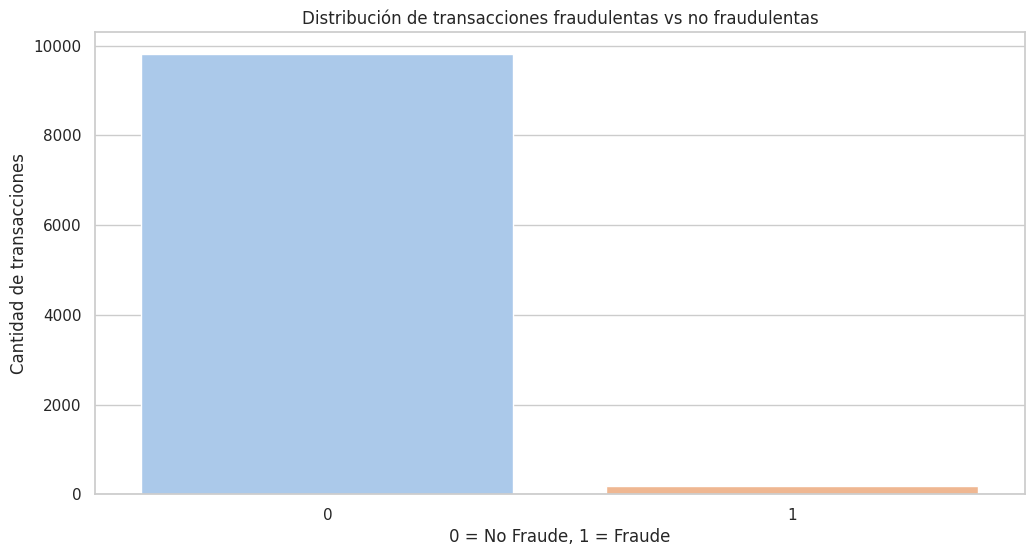

In [41]:
# Distribución de la variable objetivo (Fraude vs No Fraude)
print("\nDistribución de la variable objetivo:")
print(df['Fraud'].value_counts())

# Visualización
sns.countplot(data=df, x='Fraud', palette='pastel')
plt.title("Distribución de transacciones fraudulentas vs no fraudulentas")
plt.xlabel("0 = No Fraude, 1 = Fraude")
plt.ylabel("Cantidad de transacciones")
plt.show()


Conclusion EDA: Identificamos que la clase 1 (Fraude) de la variable `Fraud` se encuentra submuestreada. Se recomienda implementar metricas que soporten desvalance de clases, o implementar un metodo de sobremuestro en la clase minoritaria para solicitar el desvalance

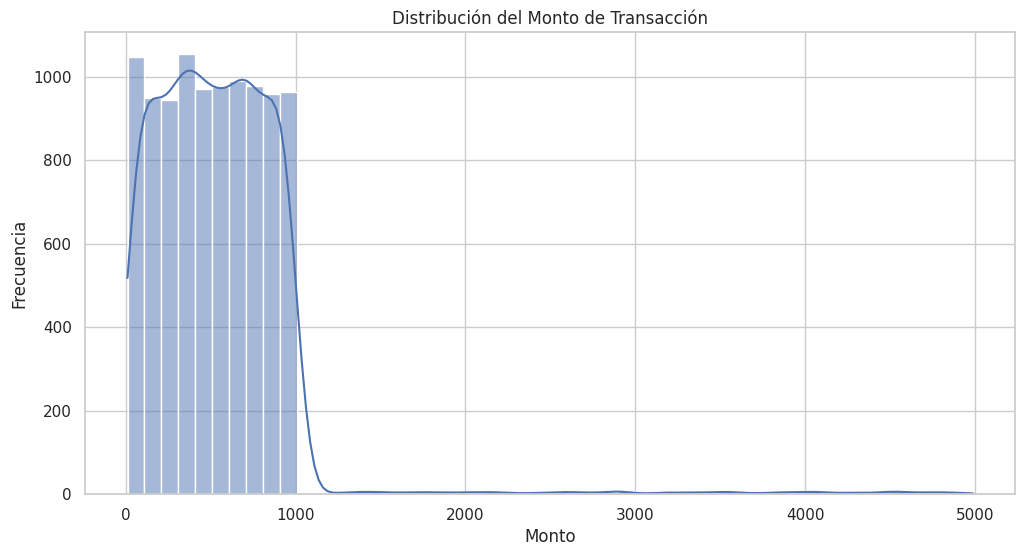

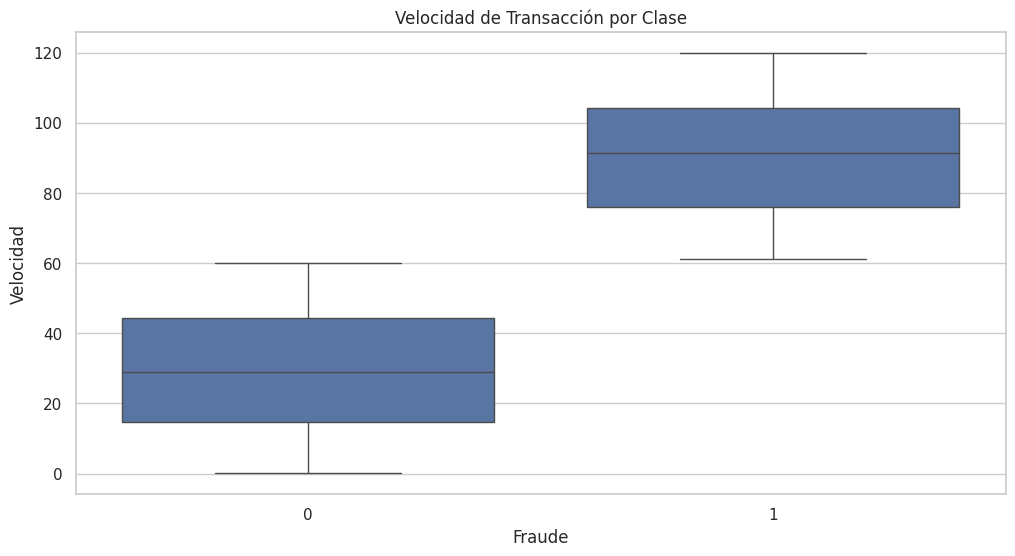

In [42]:
# Distribución del monto de transacción
sns.histplot(data=df, x='Amount', bins=50, kde=True)
plt.title('Distribución del Monto de Transacción')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

# Transacciones según velocidad
sns.boxplot(data=df, x='Fraud', y='TransactionSpeed')
plt.title('Velocidad de Transacción por Clase')
plt.xlabel('Fraude')
plt.ylabel('Velocidad')
plt.show()


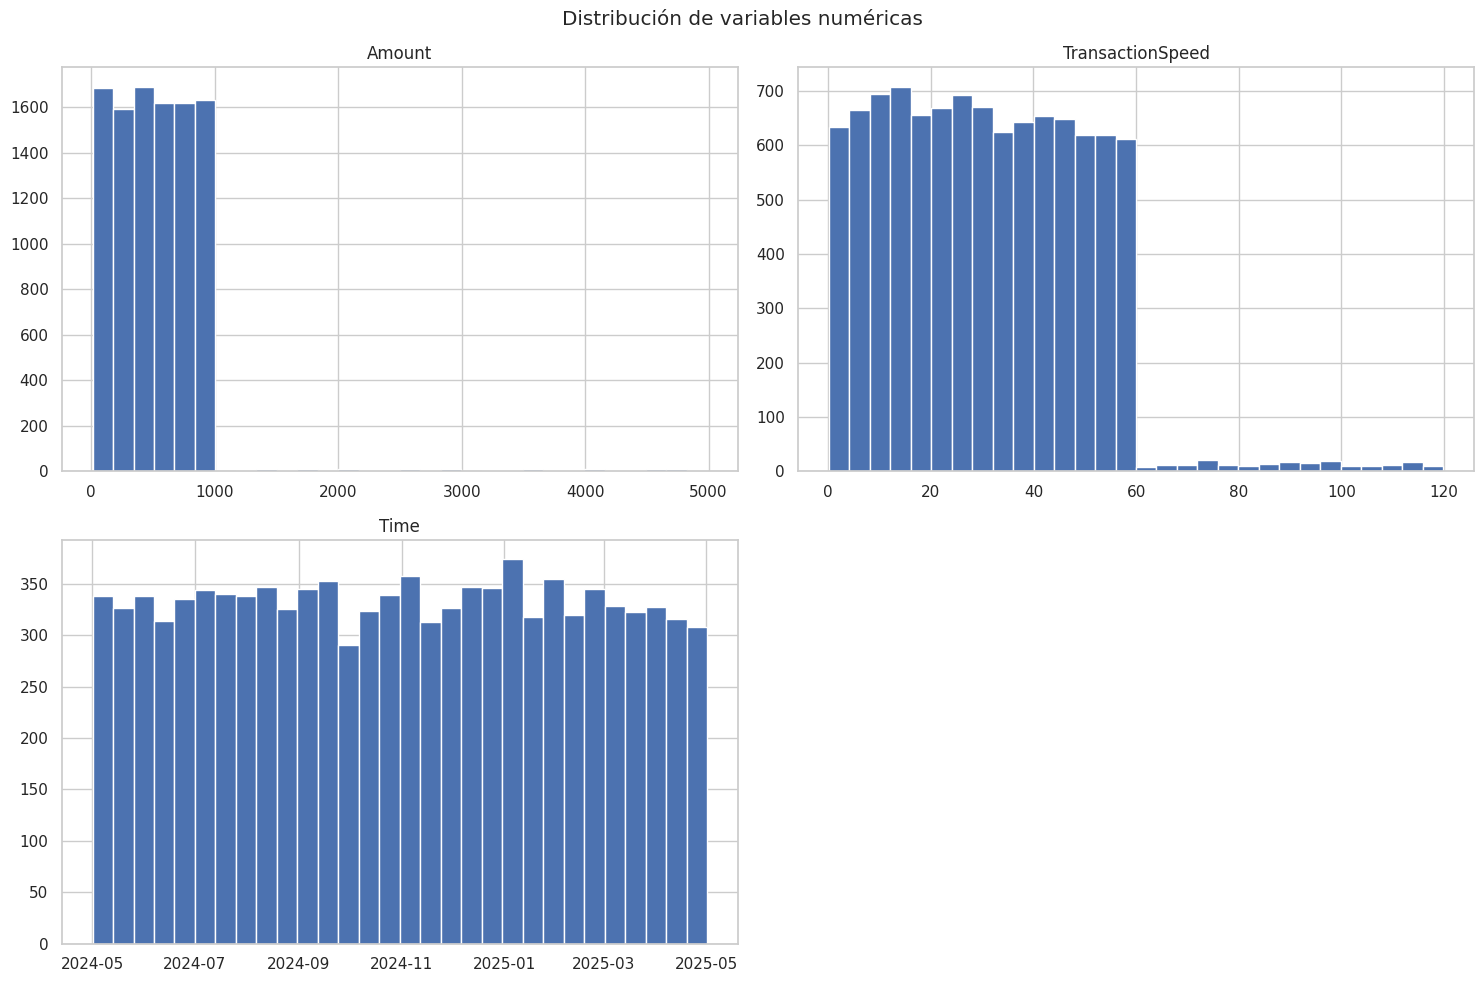

In [43]:
# Histograma general
df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas")
plt.tight_layout()
plt.show()


C2: Eda los datos de las variables AMount y TransactionSpeed se encuentra agruapados hacia la izquierda. Se cuantificara mediante el indicador de asimetria

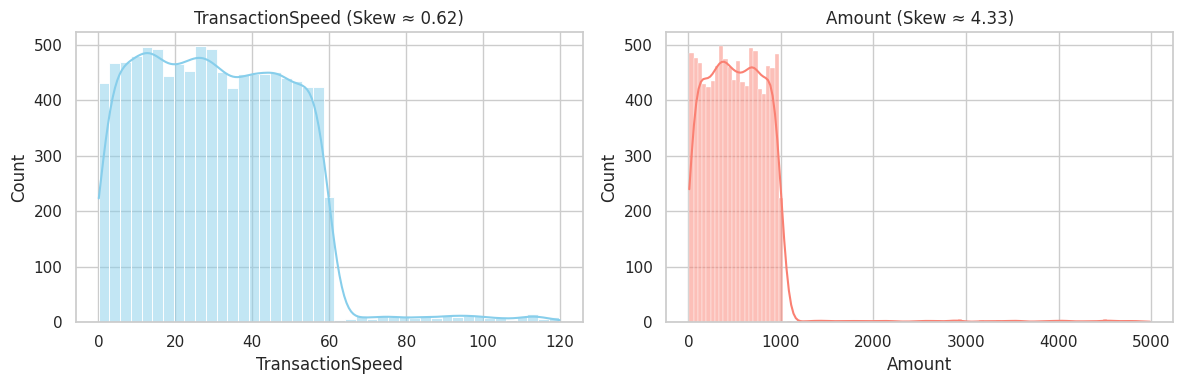

In [44]:
# obtener la asimetria de las variables numéricas
skewed_columns = {}
for col in numeric_columns:
    if col == 'Time': # ya que no soportamos la variable de tiempo
        continue
    skew_val = df[col].skew()
    if skew_val > 0.5:
        skewed_columns[col] = skew_val

# Ordenar por nivel de skew (de menor a mayor)
sorted_skews = sorted(skewed_columns.items(), key=lambda x: x[1])

# Seleccionar dos columnas: una con skew ≈ 0.6 y otra con skew alto
col_low_skew, col_high_skew = sorted_skews[0][0], sorted_skews[-1][0]

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col_low_skew], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'{col_low_skew} (Skew ≈ {skewed_columns[col_low_skew]:.2f})')

sns.histplot(df[col_high_skew], kde=True, ax=axes[1], color='salmon')
axes[1].set_title(f'{col_high_skew} (Skew ≈ {skewed_columns[col_high_skew]:.2f})')

plt.tight_layout()
plt.show()


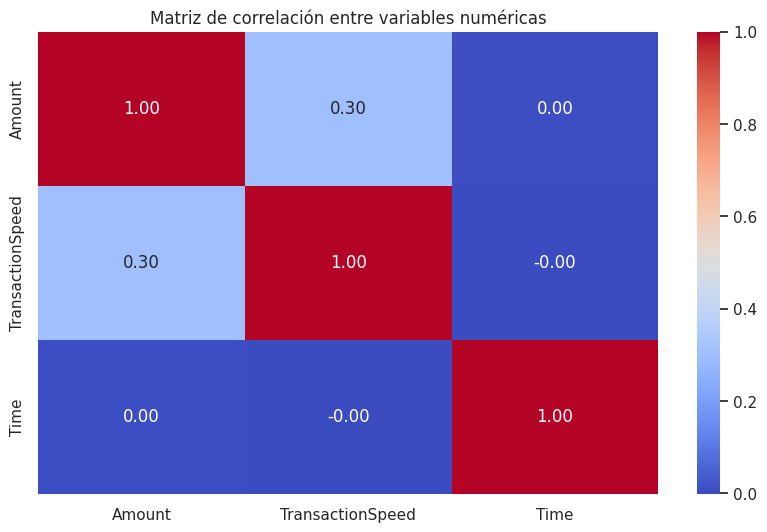

In [45]:
# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


In [46]:
# Detección de valores atípicos por IQR
for col in ['Amount', 'TransactionSpeed']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f'{col}: {len(outliers)} valores atípicos detectados')


Amount: 150 valores atípicos detectados
TransactionSpeed: 99 valores atípicos detectados


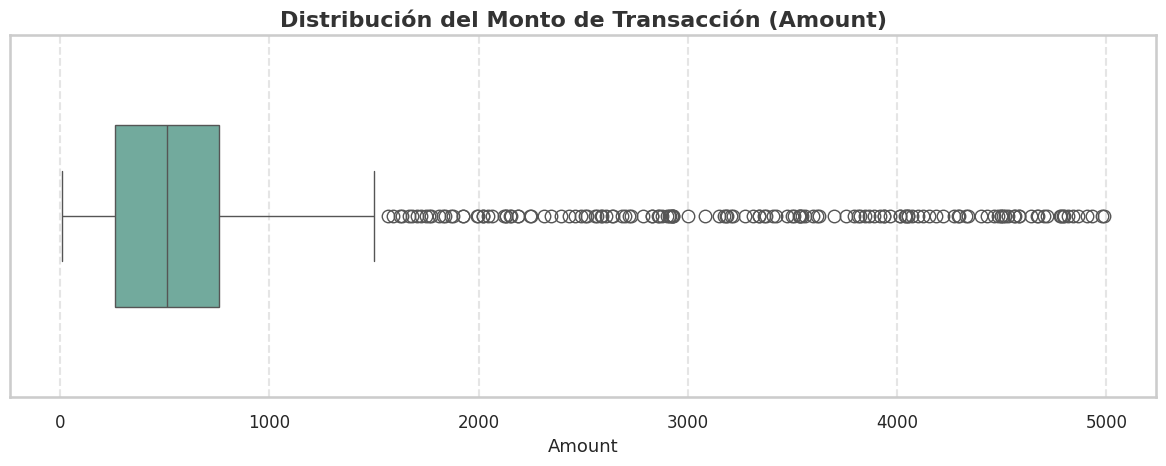

In [47]:
# Estilo
sns.set(style="whitegrid", context="talk", palette="pastel")

# Gráfico
plt.figure(figsize=(12, 5))
sns.boxplot(x='Amount', data=df, color="#69b3a2", width=0.5)
plt.title('Distribución del Monto de Transacción (Amount)', fontsize=16, weight='bold', color="#333333")
plt.xlabel('Amount', fontsize=13)
plt.tick_params(axis='x', labelsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



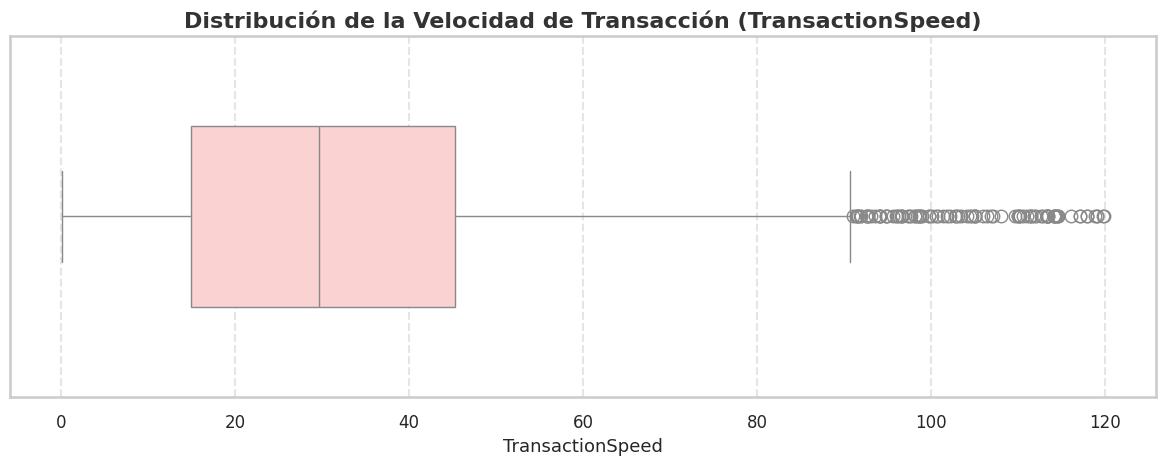

In [48]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='TransactionSpeed', data=df, color="#ffcccb", width=0.5)
plt.title('Distribución de la Velocidad de Transacción (TransactionSpeed)', fontsize=16, weight='bold', color="#333333")
plt.xlabel('TransactionSpeed', fontsize=13)
plt.tick_params(axis='x', labelsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



/tmp/ipykernel_137688/907004597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fraud', y=col, palette=colors)


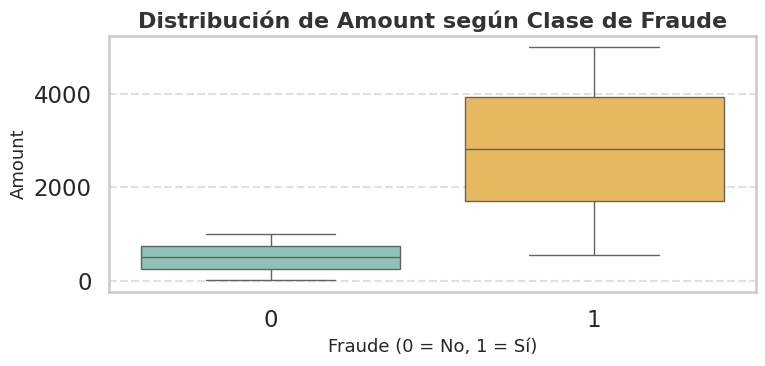

/tmp/ipykernel_137688/907004597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fraud', y=col, palette=colors)


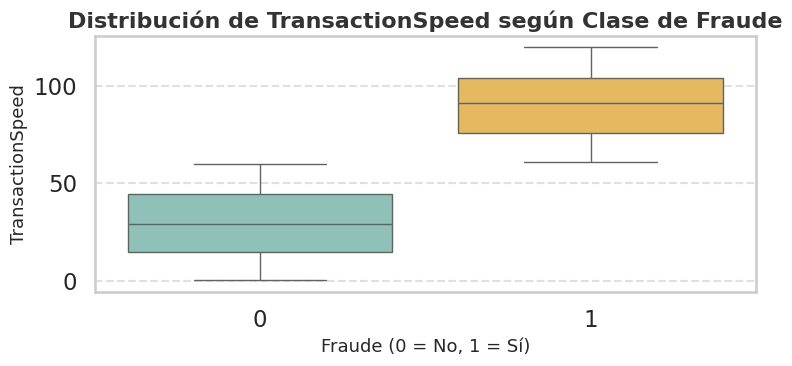

In [49]:
colors = ['#88c9bf', '#fcbf49']  # tonos suaves para comparativa

for col in ['Amount', 'TransactionSpeed']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Fraud', y=col, palette=colors)
    plt.title(f'Distribución de {col} según Clase de Fraude', fontsize=16, weight='bold', color="#333333")
    plt.xlabel('Fraude (0 = No, 1 = Sí)', fontsize=13)
    plt.ylabel(col, fontsize=13)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [50]:
df.to_csv(data_path + 'credit_card_transactions_cleaned.csv', index=False)


## **Preprocesamiento de Datos**

In [51]:
import requests

def get_ip_info(ip):
    response = requests.get(f'https://ipinfo.io/{ip}/json')
    
    # Si la solicitud fue exitosa
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        return None

ip = df['IPAddress'].iloc[0]  
info = get_ip_info(ip)
info



In [52]:
def geocode_location(location_name):
    url = 'https://nominatim.openstreetmap.org/search'
    params = {'q': location_name, 'format': 'json'}
    headers = {'User-Agent': 'geo-script'}
    res = requests.get(url, params=params, headers=headers)
    if res.status_code == 200 and res.json():
        data = res.json()[0]
        return float(data['lat']), float(data['lon'])
    return None
geocode_location(df['Location'].iloc[0])  # Cambia el índice según sea necesario

(55.0091836, -2.9713566)

In [53]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [54]:
ip = df['IPAddress'].iloc[0]  
ip_data = get_ip_info(ip)
if ip_data:
    lat_ip, lon_ip = map(float, ip_data['loc'].split(','))
    print(f"Coordenadas IP: {lat_ip}, {lon_ip}")

location_str = df['Location'][0]
loc_coords = geocode_location(location_str)


if loc_coords:
    lat_city, lon_city = loc_coords
    distance = haversine(lat_ip, lon_ip, lat_city, lon_city)
    print(f"Distancia: {distance:.2f} km")
else:
    print("No se pudo geocodificar la ubicación.")




Distancia: 9272.19 km


In [55]:
!pip install tqdm

In [ ]:
import pandas as pd
import requests
from math import radians, sin, cos, sqrt, atan2
from tqdm import tqdm

# === Funciones base ===
def get_ip_info(ip):
    try:
        response = requests.get(f'https://ipinfo.io/{ip}/json', timeout=5)
        if response.status_code == 200:
            return response.json()
    except:
        pass
    return {}

def geocode_location(location_name):
    try:
        url = 'https://nominatim.openstreetmap.org/search'
        params = {'q': location_name, 'format': 'json'}
        headers = {'User-Agent': 'geo-script'}
        res = requests.get(url, params=params, headers=headers, timeout=5)
        if res.status_code == 200 and res.json():
            data = res.json()[0]
            return float(data['lat']), float(data['lon'])
    except:
        pass
    return None

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# === Preparar columnas ===
cities, countries, orgs, locs, timezones, distances = [], [], [], [], [], []

from collections import defaultdict

ip_cache = {}
geo_cache = {}

for i, row in tqdm(df.iterrows(), total=len(df), desc="Enriqueciendo IPs"):
    ip = row['IPAddress']
    location_str = row['Location']

    # Cacheo de IP
    if ip in ip_cache:
        ip_data = ip_cache[ip]
    else:
        ip_data = get_ip_info(ip)
        ip_cache[ip] = ip_data

    # Cacheo de ciudad
    if location_str in geo_cache:
        loc_coords = geo_cache[location_str]
    else:
        loc_coords = geocode_location(location_str)
        geo_cache[location_str] = loc_coords


    # Extraer info básica
    cities.append(ip_data.get('city'))
    countries.append(ip_data.get('country'))
    orgs.append(ip_data.get('org'))
    locs.append(ip_data.get('loc'))
    timezones.append(ip_data.get('timezone'))

    # Calcular distancia si es posible
    if ip_data.get('loc') and loc_coords:
        try:
            lat_ip, lon_ip = map(float, ip_data['loc'].split(','))
            lat_city, lon_city = loc_coords
            dist = haversine(lat_ip, lon_ip, lat_city, lon_city)
            distances.append(dist)
        except:
            distances.append(None)
    else:
        distances.append(None)

# === Agregar al DataFrame ===
df['IP_City'] = cities
df['IP_Country'] = countries
df['IP_Org'] = orgs
df['IP_Coords'] = locs
df['IP_Timezone'] = timezones
df['Distancia_km'] = distances


Enriqueciendo IPs:   0%|          | 0/10000 [00:00<?, ?it/s]

Enriqueciendo IPs:   4%|▎         | 356/10000 [07:02<3:12:21,  1.20s/it]

In [ ]:
# Crear columna booleana: ¿la IP contiene la ubicación?
df['Location_clean'] = df['Location'].str.lower()
df['IPAddress_clean'] = df['IPAddress'].str.lower()

df['ip_matches_location'] = df.apply(
    lambda row: 1 if row['Location_clean'] in row['IPAddress_clean'] else 0,
    axis=1
)

 Variable 'ip_matches_location' creada. Ejemplos:
             Location        IPAddress  ip_matches_location
0            Longtown    102.247.49.50                    0
1           Woodsland     153.157.50.7                    0
2         Jessicatown  151.174.154.123                    0
3  North Krystalburgh    130.70.79.149                    0
4   East Danielletown   195.136.16.190                    0


In [ ]:
# Eliminamos columnas irrelevantes o redundantes
df_model = df.drop(columns=['TransactionID', 'CardholderName', 'MerchantName', 'IPAddress'])

# Incluimos la nueva variable creada
df_model['ip_matches_location'] = df['ip_matches_location']

# Verificamos columnas finales
print("Variables para modelado:", df_model.columns.tolist())


Variables para modelado: ['Time', 'Amount', 'MCC', 'Location', 'Device', 'TransactionSpeed', 'Fraud', 'ip_matches_location']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Device', 'Location']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

print("Variables categóricas codificadas con LabelEncoder.")
print(df_model[label_cols].head())


Variables categóricas codificadas con LabelEncoder.
   Device  Location
0       0      3302
1       1      7656
2       3      2310
3       0      4645
4       0      1155


In [ ]:
from sklearn.preprocessing import StandardScaler

# Variables numéricas a escalar
numeric_cols = ['Amount', 'TransactionSpeed', 'MCC']

# Escalamos usando StandardScaler
scaler = StandardScaler()
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])

# Revisión rápida
df_model[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Amount,10000.0,2.614797e-16,1.00005,-1.167889,-0.617630,-0.076317,0.462122,9.653234
TransactionSpeed,10000.0,-1.701750e-16,1.00005,-1.604307,-0.829088,-0.056751,0.761157,4.668154
MCC,10000.0,1.787015e-16,1.00005,-1.037036,-0.811300,-0.207832,0.026933,2.029964


In [ ]:
from sklearn.model_selection import train_test_split

# Variables independientes (X) y objetivo (y)
X = df_model.drop(columns=['Fraud'])
y = df_model['Fraud']

# Primera división: entrenamiento y temporal
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

# Segunda división: validación y prueba
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verificar tamaños
print(f"Entrenamiento: {X_train.shape}, Validación: {X_val.shape}, Prueba: {X_test.shape}")


Entrenamiento: (7000, 7), Validación: (1500, 7), Prueba: (1500, 7)


In [ ]:
# Eliminar Time del conjunto de datos antes de aplicar SMOTE
X = df_model.drop(columns=['Fraud', 'Time'])  # Quitamos Time aquí
y = df_model['Fraud']


In [ ]:
# División 70-15-15 con columna Time eliminada
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


NameError: name 'SMOTE' is not defined

In [ ]:
# Eliminar Time
X = df_model.drop(columns=['Fraud', 'Time'])
y = df_model['Fraud']

# División de datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(" División de datos completada:")
print(f"- Entrenamiento: {X_train.shape}")
print(f"- Validación:   {X_val.shape}")
print(f"- Prueba:       {X_test.shape}")

# Ver distribución antes del balanceo
print("\n Distribución de clases en entrenamiento (antes de SMOTE):")
print(y_train.value_counts())

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Ver distribución después del balanceo
print("\n Clases balanceadas con SMOTE (entrenamiento):")
print(y_train_bal.value_counts())


 División de datos completada:
- Entrenamiento: (7000, 6)
- Validación:   (1500, 6)
- Prueba:       (1500, 6)

 Distribución de clases en entrenamiento (antes de SMOTE):
Fraud
0    6866
1     134
Name: count, dtype: int64

 Clases balanceadas con SMOTE (entrenamiento):
Fraud
0    6866
1    6866
Name: count, dtype: int64


**Modelado:**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Entrenamiento del modelo con datos balanceados (SMOTE)
nb_model = GaussianNB()
nb_model.fit(X_train_bal, y_train_bal)

# Predicción en conjunto de prueba
y_pred_nb = nb_model.predict(X_test)

# Evaluación del modelo
print("Clasificador Naive Bayes Gaussiano — Resultados en el conjunto de prueba")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, digits=4))


Clasificador Naive Bayes Gaussiano — Resultados en el conjunto de prueba
[[1471    0]
 [   3   26]]
              precision    recall  f1-score   support

           0     0.9980    1.0000    0.9990      1471
           1     1.0000    0.8966    0.9455        29

    accuracy                         0.9980      1500
   macro avg     0.9990    0.9483    0.9722      1500
weighted avg     0.9980    0.9980    0.9979      1500



In [ ]:
from sklearn.neural_network import MLPClassifier

# Crear MLP con 1 capa oculta de 16 neuronas
mlp_model = MLPClassifier(hidden_layer_sizes=(16,), activation='relu',
                          solver='adam', max_iter=300, random_state=42)

# Entrenar con datos balanceados
mlp_model.fit(X_train_bal, y_train_bal)

# Predicción
y_pred_mlp = mlp_model.predict(X_test)

# Evaluación
print("Perceptrón Multicapa (MLP) — Resultados en el conjunto de prueba")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp, digits=4))


Perceptrón Multicapa (MLP) — Resultados en el conjunto de prueba
[[1466    5]
 [   2   27]]
              precision    recall  f1-score   support

           0     0.9986    0.9966    0.9976      1471
           1     0.8438    0.9310    0.8852        29

    accuracy                         0.9953      1500
   macro avg     0.9212    0.9638    0.9414      1500
weighted avg     0.9956    0.9953    0.9954      1500



In [ ]:
from sklearn.model_selection import GridSearchCV

# Definimos una pequeña grilla de búsqueda
param_grid = {
    'hidden_layer_sizes': [(8,), (16,), (32,), (16, 8)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'max_iter': [300]
}

# GridSearch sobre el conjunto de entrenamiento balanceado
mlp_grid = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
mlp_grid.fit(X_train_bal, y_train_bal)

print("Mejores hiperparámetros encontrados para MLP:")
print(mlp_grid.best_params_)

# Evaluar el mejor modelo
best_mlp = mlp_grid.best_estimator_
y_pred_best = best_mlp.predict(X_test)

print("Mejor MLP — Resultados en el conjunto de prueba")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, digits=4))


Mejores hiperparámetros encontrados para MLP:
{'activation': 'relu', 'hidden_layer_sizes': (16, 8), 'max_iter': 300, 'solver': 'adam'}
Mejor MLP — Resultados en el conjunto de prueba
[[1468    3]
 [   2   27]]
              precision    recall  f1-score   support

           0     0.9986    0.9980    0.9983      1471
           1     0.9000    0.9310    0.9153        29

    accuracy                         0.9967      1500
   macro avg     0.9493    0.9645    0.9568      1500
weighted avg     0.9967    0.9967    0.9967      1500



**Evaluación del modelo**

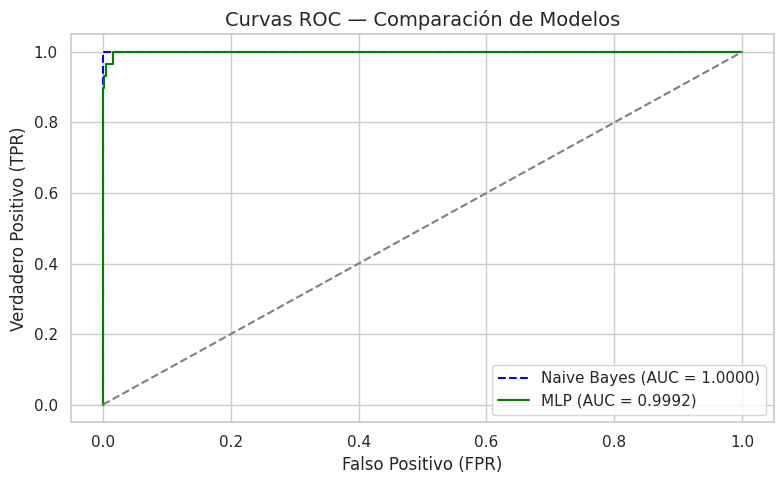

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Probabilidades para curva ROC
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
y_prob_mlp = best_mlp.predict_proba(X_test)[:, 1]

# Calcular curvas
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)

# AUC
auc_nb = auc(fpr_nb, tpr_nb)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.4f})', linestyle='--', color='blue')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.4f})', linestyle='-', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('Curvas ROC — Comparación de Modelos', fontsize=14)
plt.xlabel('Falso Positivo (FPR)')
plt.ylabel('Verdadero Positivo (TPR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
